In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

In [2]:
df_train = pd.read_csv('Data_train.csv', usecols=['x','y','class'])
df_test = pd.read_csv('Data_test.csv', usecols=['x','y','class'])

In [3]:
df_train.head()

,x,y,class
0,9.478938,-4.950071,1
1,-8.476344,3.635107,3
2,4.080771,-3.684994,3
3,-0.509729,-5.700655,2
4,-0.898476,-4.007790,3


In [4]:
df_test.head()

,x,y,class
0,2.597513,-1.720239,1
1,7.951270,6.252087,2
2,-6.913355,4.858647,3
3,-2.948122,-0.585784,3
4,0.865727,-3.874243,3


In [5]:
# split data
X_train = df_train.drop('class', axis=1)
X_test = df_test.drop('class', axis=1)

y_train = df_train['class']
y_test = df_test['class']

## Task 0: Naïve Logistic Regression [5 pts]

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
lr = LogisticRegression()

In [8]:
lr.fit(X_train, y_train)

LogisticRegression()

In [9]:
lr.predict(X_test)

array([1, 2, 3, ..., 1, 3, 1], dtype=int64)

In [10]:
print(f"Accuracy on Naive Logistic Regression: {(lr.score(X_test, y_test))*100}%")

Accuracy on Naive Logistic Regression: 0.34773333333333334


## Task 1: Train Data Transformation [30 pts]

In [11]:
x = np.array(df_train['x'])
y = np.array(df_train['y'])
label = np.array(df_train['class'])

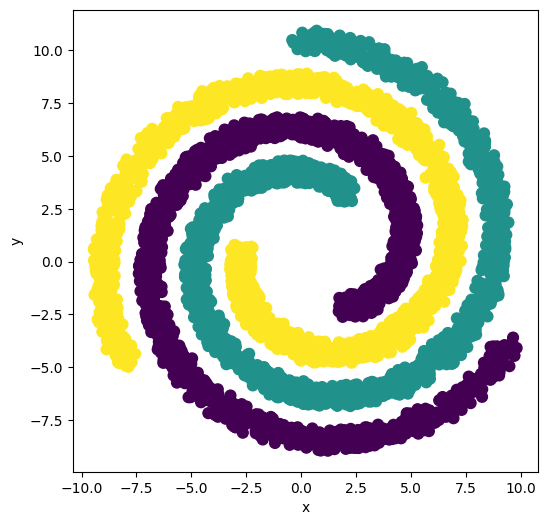

In [12]:
fig = plt.figure(figsize=(6,6))
plt.scatter(x, y, c=label, s=60)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [13]:
df_train.info

<bound method DataFrame.info of              x         y  class
0     9.478938 -4.950071      1
1    -8.476344  3.635107      3
2     4.080771 -3.684994      3
3    -0.509729 -5.700655      2
4    -0.898476 -4.007790      3
...        ...       ...    ...
5620 -2.128834 -5.277422      2
5621  0.384849 -6.268598      2
5622  2.521155 -2.438412      1
5623  1.310529  8.159396      3
5624 -1.655852 -5.248543      2

[5625 rows x 3 columns]>

In [14]:
df_train.isnull().sum()

x        0
y        0
class    0
dtype: int64

In [15]:
df_train.shape

(5625, 3)

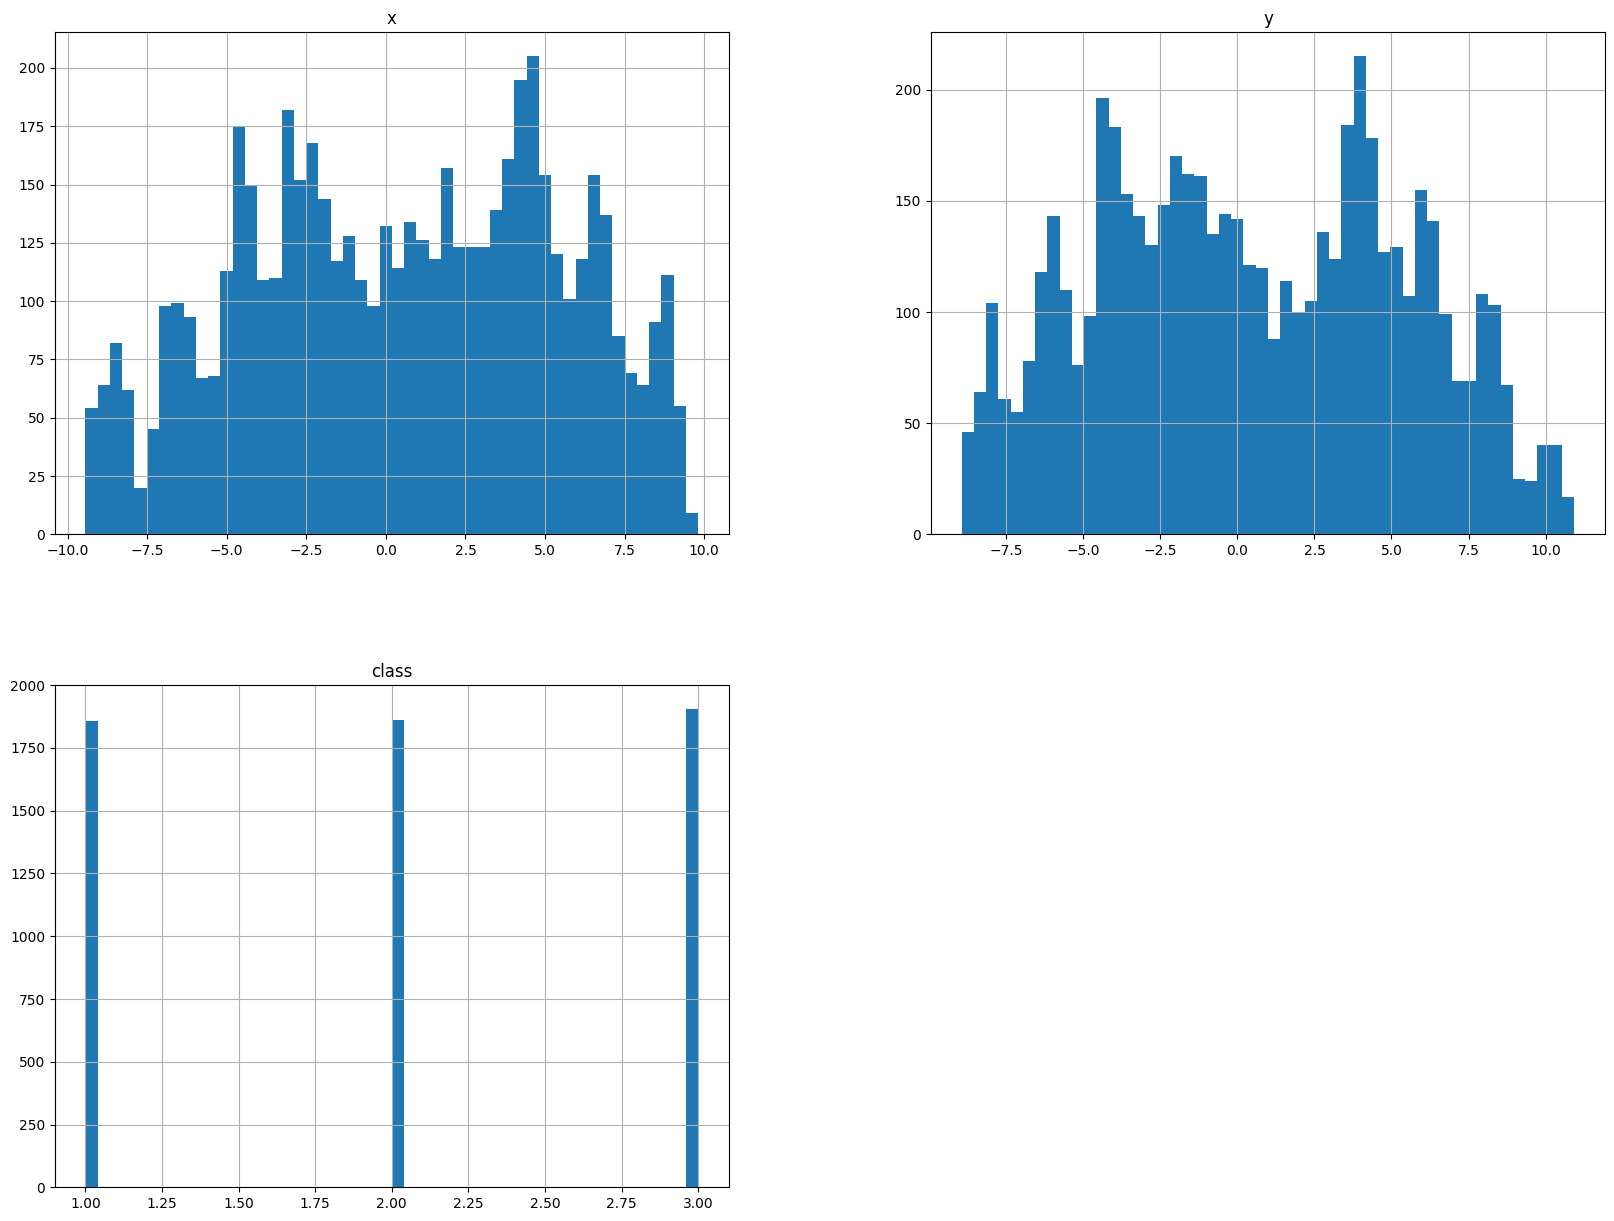

In [16]:
df_train.hist(bins=50, figsize=(20,15))
plt.show()

In [17]:
correlation_matrix = df_train.corr()
correlation_matrix["class"].sort_values(ascending=False)

class    1.000000
y        0.146074
x       -0.053405
Name: class, dtype: float64

In [18]:
df_train.corr().style.background_gradient(cmap='magma')

,x,y,class
x,1.000000,-0.002237,-0.053405
y,-0.002237,1.000000,0.146074
class,-0.053405,0.146074,1.000000


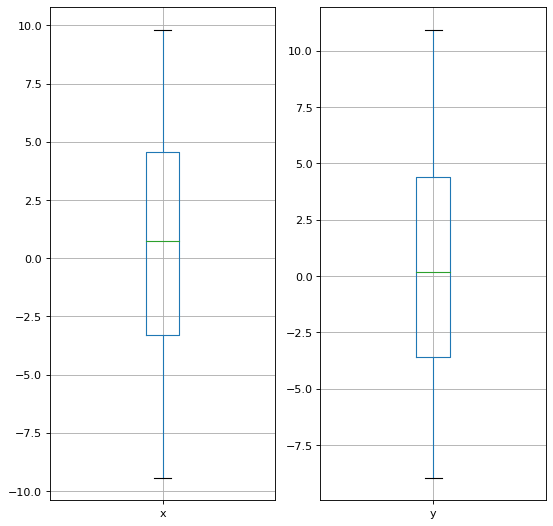

In [19]:
plt.figure(figsize=(8,8),dpi=80)
plt.subplot(121)
df_train.boxplot(column=['x'])
plt.subplot(122)
df_train.boxplot(column=['y'])
plt.show()

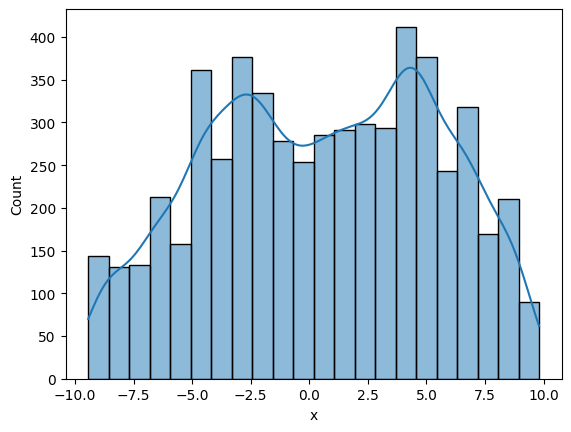

In [20]:
sns.histplot(df_train.x, kde=True)
plt.show()

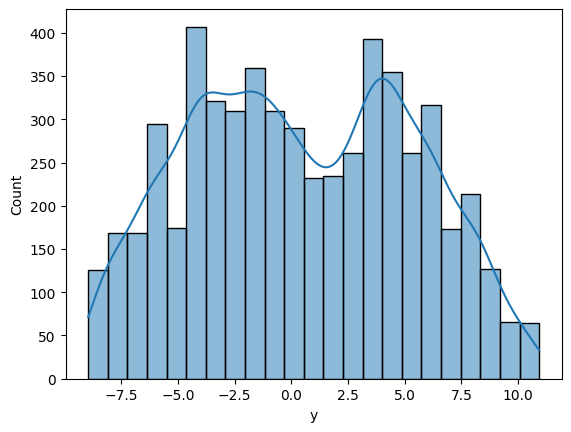

In [21]:
sns.histplot(df_train.y, kde=True)
plt.show()

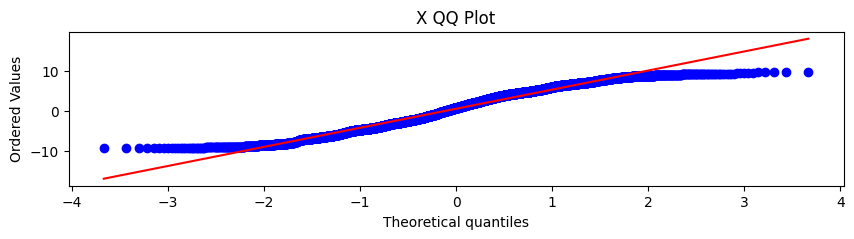

In [22]:
plt.figure(figsize=(10,2))
stats.probplot(df_train['x'], dist="norm", plot=plt)
plt.title('X QQ Plot')
plt.show()

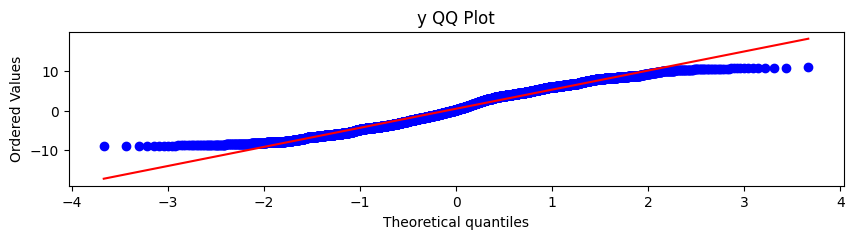

In [23]:
plt.figure(figsize=(10,2))
stats.probplot(df_train['y'], dist="norm", plot=plt)
plt.title('y QQ Plot')
plt.show()

In [24]:
def mapping(x, y):
    z = np.c_[(x, y)]
    
    a = z[:,0]
    b = z[:,1]

    z_1 = a * np.log(a)
    z_2 = b * np.log(b)
    z_3 = 0.5**a * np.log(b)
    
    # using np.exp (little lower accuracy)
    #z_1 = np.exp(np.sqrt(a))
    #z_2 = np.exp(np.sqrt(b))
    #z_3 = np.exp(np.sqrt(a+b))

    trans_x = np.array([z_1, z_2, z_3])
    return trans_x

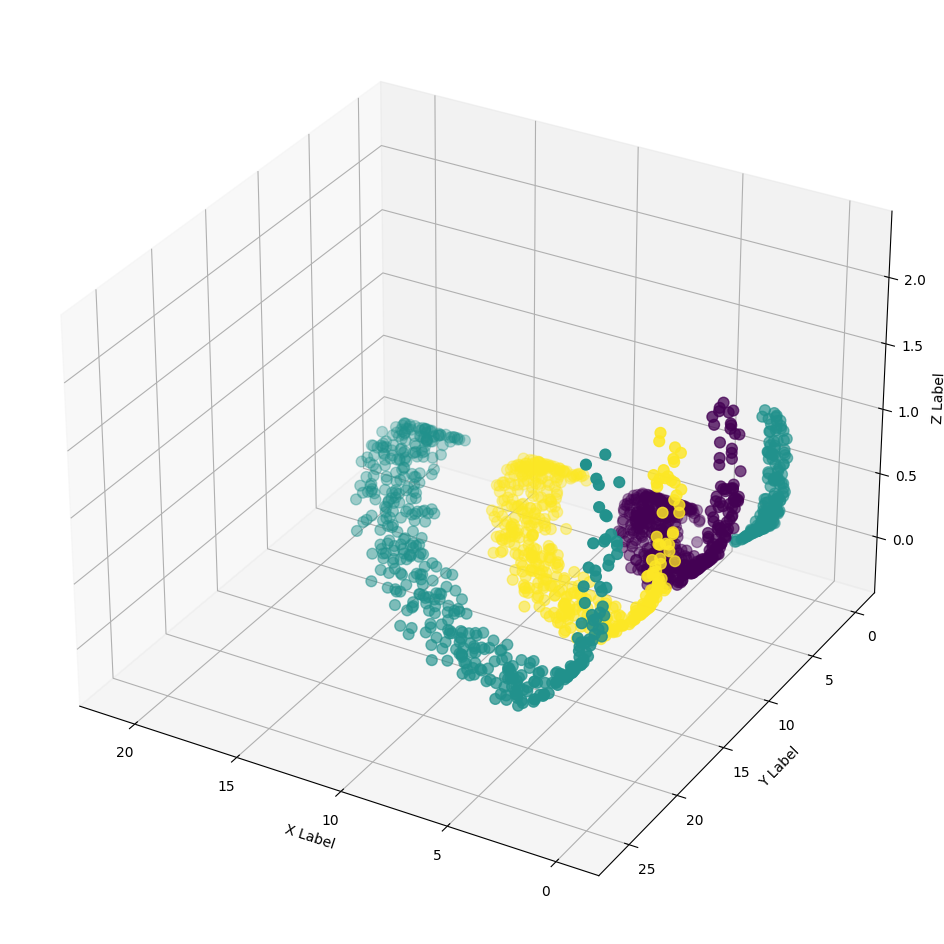

In [25]:
x_1 = mapping(x,y)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_1[0], x_1[1], x_1[2], c=label, s=60)
ax.view_init(30, 120)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

### Assumptions of Linear Regression
 1. Linear relationship between each independent variable and the dependent variable
 2. No or little Multicollinearity - No or Little Linearity between Predictors
 3. Homoscedasticity ( Constant Error Variance )
 4. Independence of Errors ( vs Autocorrelation )
 5. Multivariate Normality ( Normality of Errors )

## Task 2: Linear Parametric Classification [10 pts]

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [27]:
def evalute(model, X_train, X_test, y_train, y_test):
    print(f"Training Score: {model.score(X_train, y_train)}")
    print(f"Testing  Score: {model.score(X_test, y_test)}")
    
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Weights:")
    print(np.hstack((model.intercept_[:,None], model.coef_)))
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True)
    plt.show()

In [28]:
def make_models(X_train, X_test, y_train, y_test):
    print(f"Result:")
    model = LogisticRegression()
    model.fit(X_train, y_train)
    evalute(model, X_train, X_test, y_train, y_test)


    print(f"Optimizing Model....")
    alpha = np.linspace(10**(-5), 10**(5), 100)

    params = {
        "tol": alpha
    }

    grid = GridSearchCV(LogisticRegression(), params, n_jobs=-1, verbose=1, return_train_score=True, cv=2)
    res = grid.fit(X_train, y_train)

    scores = res.cv_results_["mean_test_score"]

    plt.figure(figsize=(15, 5))
    sns.lineplot(x=alpha, y=scores)
    plt.show()

    print(f'Best Model aplha value: {res.best_params_["tol"]}\nAccuracy on test: {(res.best_score_)*100}%.')

In [29]:
def add_cols(df):
    df['f1'] = df.x * np.log(df.x)
    df['f2'] = df.y * np.log(df.y)
    df['f3'] = 0.5**df.x * np.log(df.y)
    
    # using exponents
    #df['f1'] = np.exp(np.sqrt(df.x))
    #df['f2'] = np.exp(np.sqrt(df.y))
    #df['f3'] = np.exp(np.sqrt(df.x + df.y))
    # remove NaN values (decreases data but increases accuracy)
    df = df.dropna()
    
    return df

In [30]:
# create duplicate dataframe to store the pre processed values
df_tr = pd.read_csv('Data_train.csv', usecols=['x','y','class'])
df_te = pd.read_csv('Data_test.csv', usecols=['x','y','class'])

df_tr = add_cols(df_tr)
df_te = add_cols(df_te)

In [31]:
x_tr = df_tr.drop(['x', 'y', 'class'], axis=1)
x_te = df_te.drop(['x', 'y', 'class'], axis=1)

y_tr = df_tr['class']
y_te = df_te['class']

Result:
Training Score: 0.615530303030303
Testing  Score: 0.6186915887850467
Weights:
[[ 2.97712126 -0.2526569  -0.13651127 -1.61946735]
 [-2.16212877  0.17675564  0.09302591  1.42418913]
 [-0.8149925   0.07590125  0.04348536  0.19527822]]


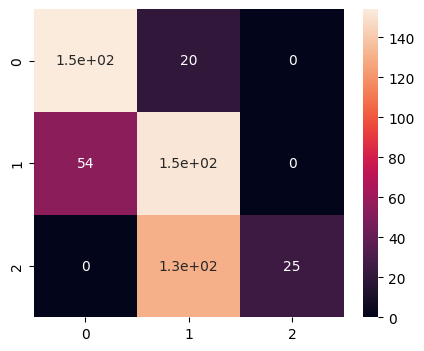

Optimizing Model....
Fitting 2 folds for each of 100 candidates, totalling 200 fits


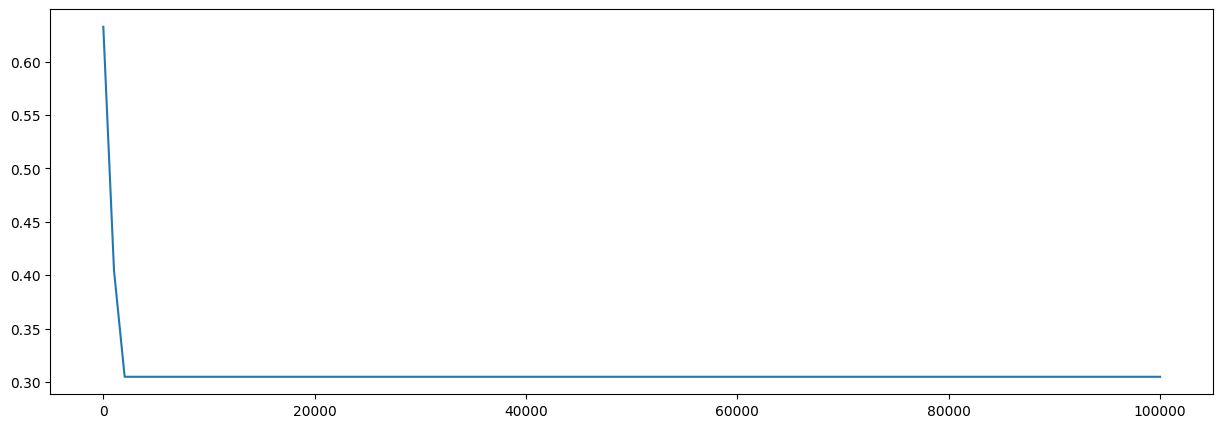

Best Model aplha value: 1e-05
Accuracy on test: 63.25757575757576%.


In [32]:
make_models(x_tr, x_te, y_tr, y_te)

## Task 3: Transformation using Kernel Method [20 pts]

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import SplineTransformer
from sklearn.preprocessing import FunctionTransformer

In [34]:
kernels = {
    "PolynomialFeatures": PolynomialFeatures(),
    "PowerTransformer": PowerTransformer(),
    "QuantileTransformer": QuantileTransformer(),
    "SplineTransformer": SplineTransformer(),
    "FunctionTransformer": FunctionTransformer(),
}

In [35]:
def evalute(model, X_train, X_test, y_train, y_test):
    print(f"Training Score : {model.score(X_train, y_train)}")
    print(f"Testing  Score : {model.score(X_test, y_test)}")
    
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True)
    plt.show()

In [36]:
def make_models(X_train, X_test, y_train, y_test):
    print(f"Result:")
    model = LogisticRegression()
    model.fit(X_train, y_train)
    evalute(model, X_train, X_test, y_train, y_test)


    print(f"Optimizing Model....")
    alpha = np.linspace(10**(-5), 10**(5), 100)

    params = {
        "tol": alpha
    }

    grid = GridSearchCV(LogisticRegression(), params, n_jobs=-1, verbose=1, return_train_score=True, cv=2)
    res = grid.fit(X_train, y_train)

    scores = res.cv_results_["mean_test_score"]

    plt.figure(figsize=(15, 5))
    sns.lineplot(x=alpha, y=scores)
    plt.show()

    print(f'Best model alpha value: {res.best_params_["tol"]}\nAccuracy on test: {(res.best_score_)*100}%.')

Transformation using Kernel PolynomialFeatures
Result:
Training Score : 0.36675555555555556
Testing  Score : 0.3488


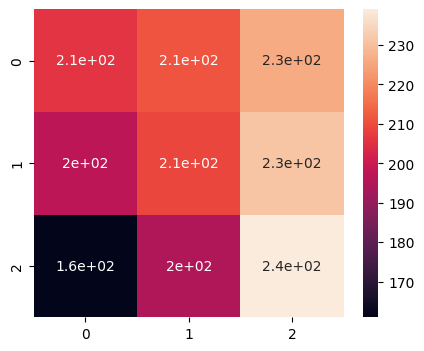

Optimizing Model....
Fitting 2 folds for each of 100 candidates, totalling 200 fits


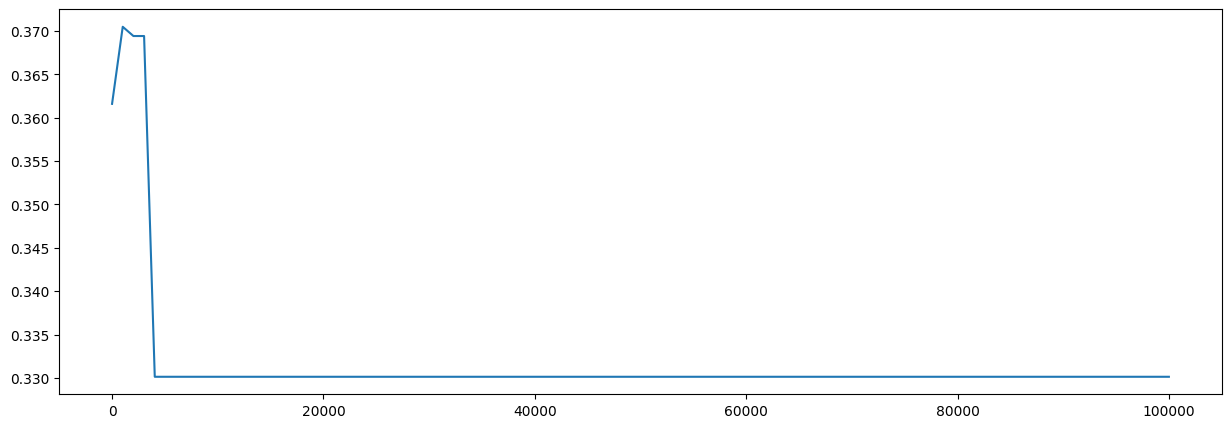

Best model alpha value: 1010.10102
Accuracy on test: 37.04882684993823%.


Transformation using Kernel PowerTransformer
Result:
Training Score : 0.3624888888888889
Testing  Score : 0.3456


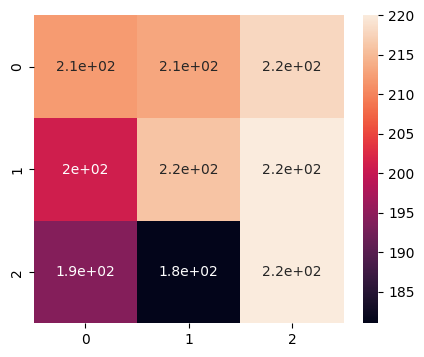

Optimizing Model....
Fitting 2 folds for each of 100 candidates, totalling 200 fits


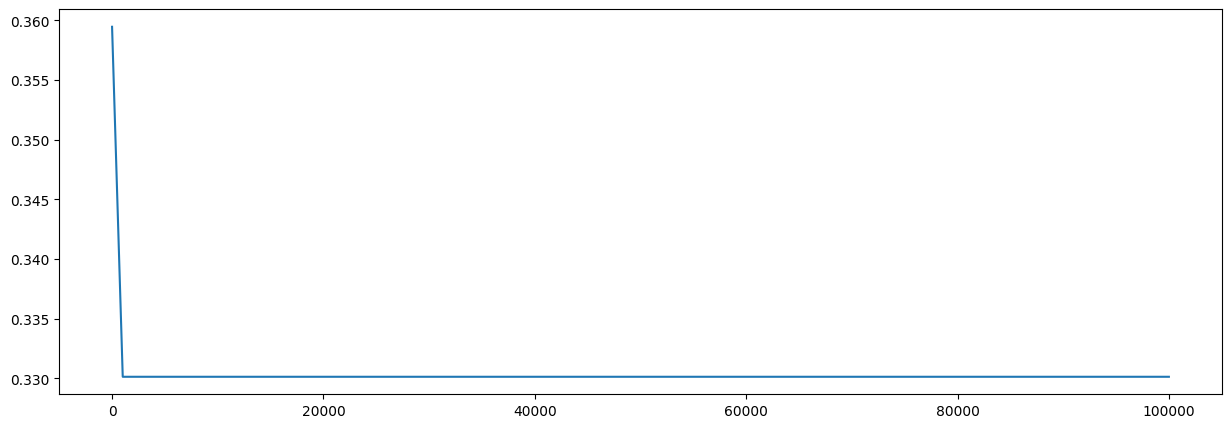

Best model alpha value: 1e-05
Accuracy on test: 35.9465413830018%.


Transformation using Kernel QuantileTransformer
Result:
Training Score : 0.3511111111111111
Testing  Score : 0.33226666666666665


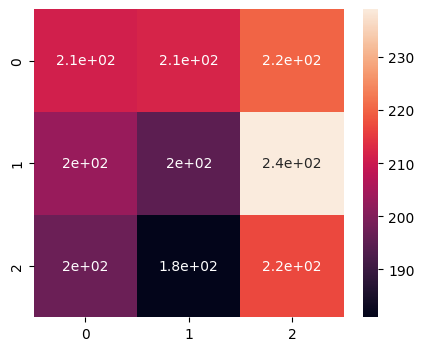

Optimizing Model....
Fitting 2 folds for each of 100 candidates, totalling 200 fits


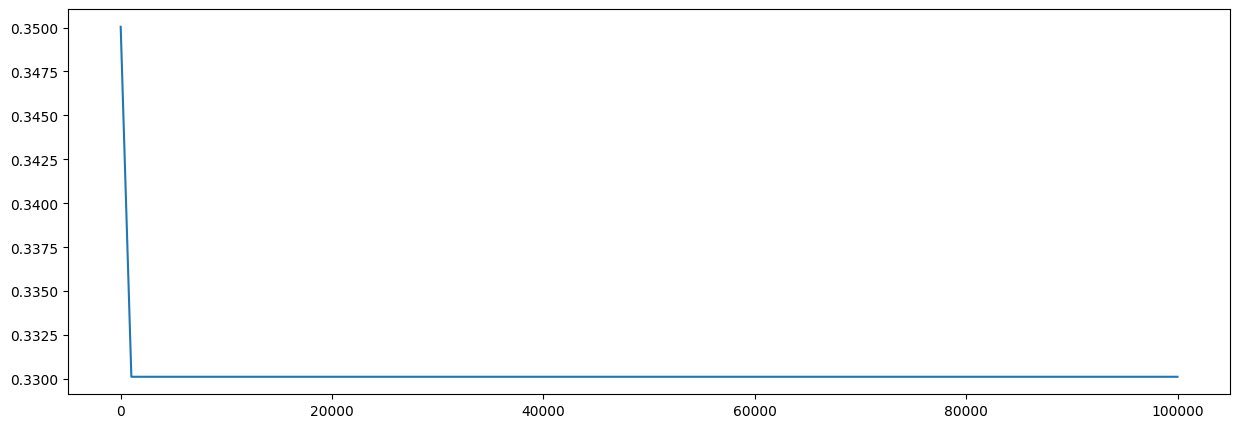

Best model alpha value: 1e-05
Accuracy on test: 35.00432861248248%.


Transformation using Kernel SplineTransformer
Result:
Training Score : 0.5831111111111111
Testing  Score : 0.5850666666666666


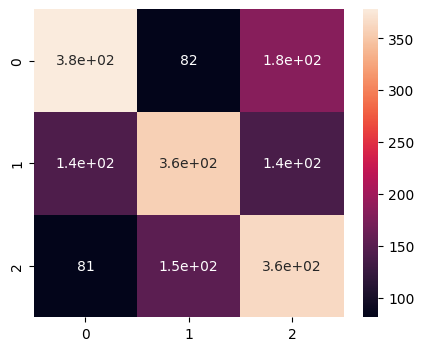

Optimizing Model....
Fitting 2 folds for each of 100 candidates, totalling 200 fits


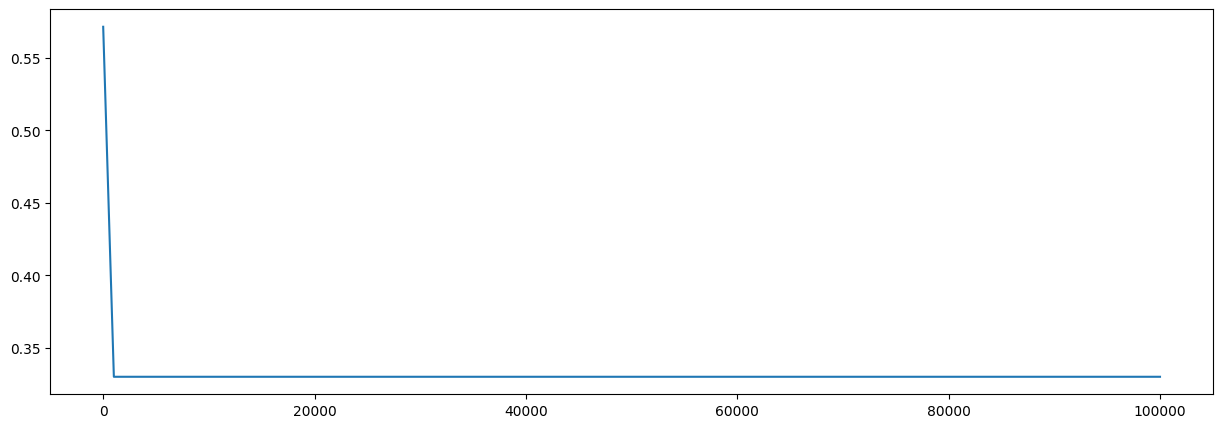

Best model alpha value: 1e-05
Accuracy on test: 57.13757731200244%.


Transformation using Kernel FunctionTransformer
Result:
Training Score : 0.3626666666666667
Testing  Score : 0.34773333333333334


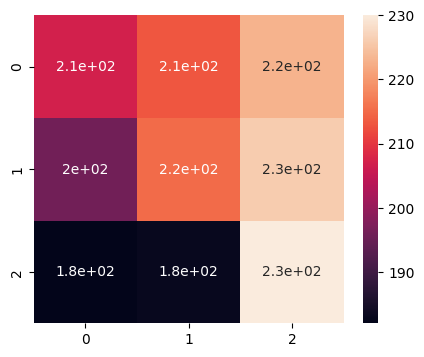

Optimizing Model....
Fitting 2 folds for each of 100 candidates, totalling 200 fits


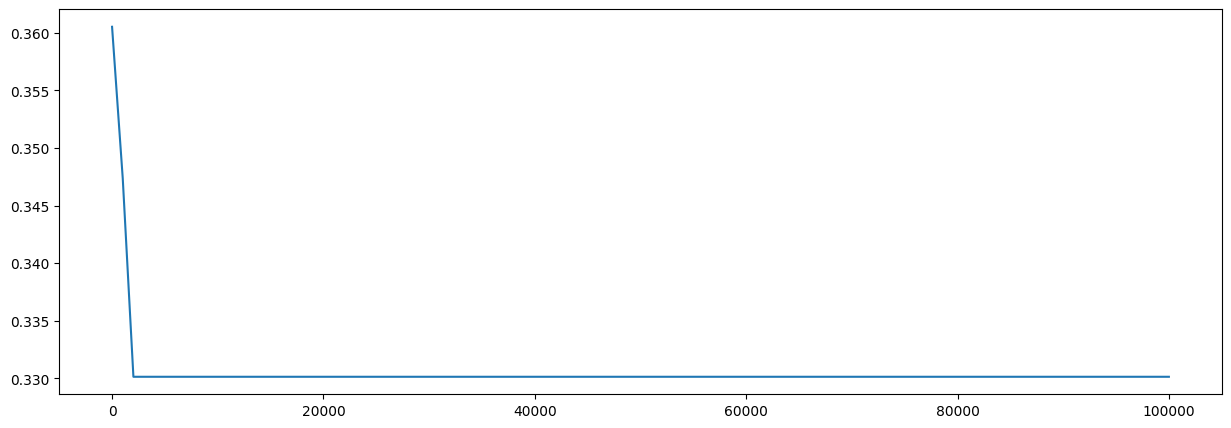

Best model alpha value: 1e-05
Accuracy on test: 36.05323965797893%.




In [37]:
for name, kernel in kernels.items():
    print(f"Transformation using Kernel {name}")
    X_tr = kernel.fit_transform(X_train)
    X_ts = kernel.fit_transform(X_test)
    make_models(X_tr, X_ts, y_train, y_test)
    print()
    print("="*120)
    print()

Transformation using Kernel PolynomialFeatures
Result:
Training Score : 0.8390151515151515
Testing  Score : 0.8448598130841122


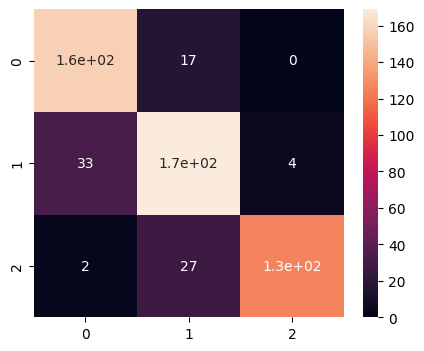

Optimizing Model....
Fitting 2 folds for each of 100 candidates, totalling 200 fits


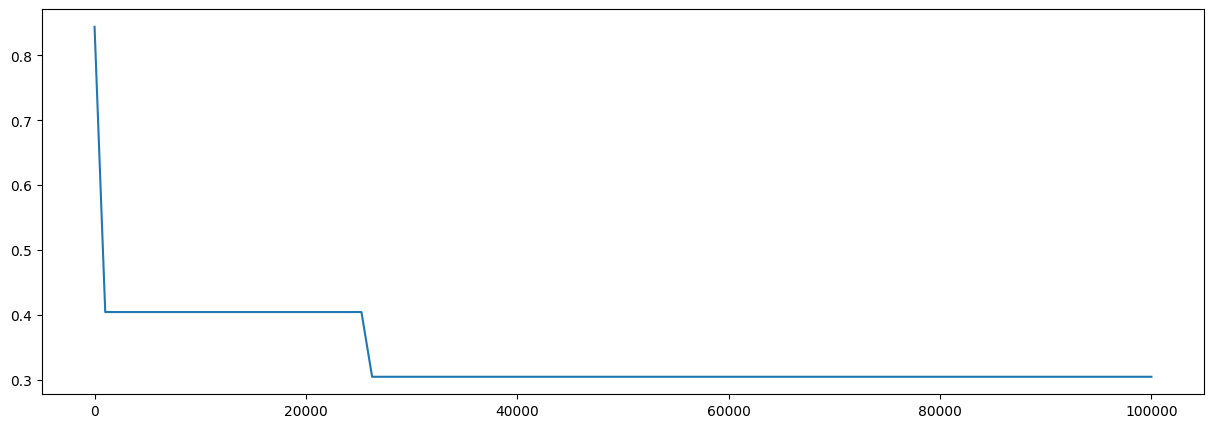

Best model alpha value: 1e-05
Accuracy on test: 84.40656565656566%.


Transformation using Kernel PowerTransformer
Result:
Training Score : 0.6647727272727273
Testing  Score : 0.6224299065420561


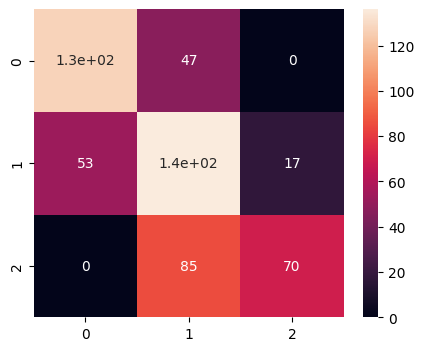

Optimizing Model....
Fitting 2 folds for each of 100 candidates, totalling 200 fits


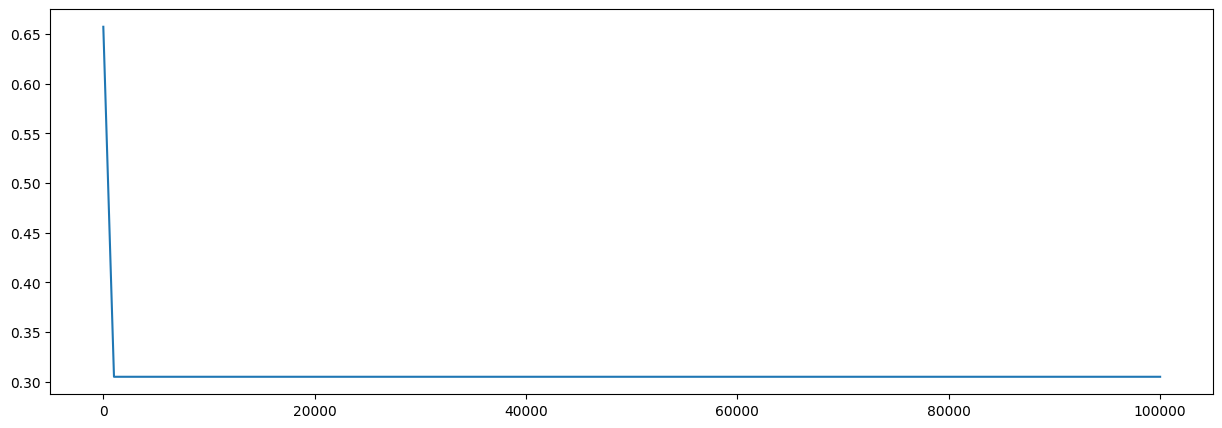

Best model alpha value: 1e-05
Accuracy on test: 65.71969696969697%.


Transformation using Kernel QuantileTransformer
Result:
Training Score : 0.4671717171717172
Testing  Score : 0.47102803738317756


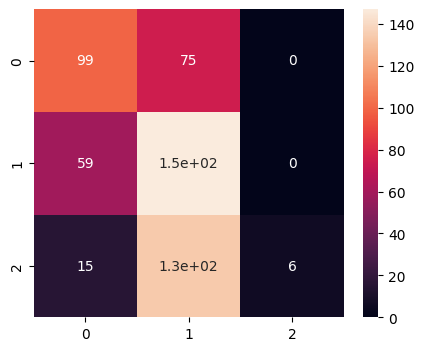

Optimizing Model....
Fitting 2 folds for each of 100 candidates, totalling 200 fits


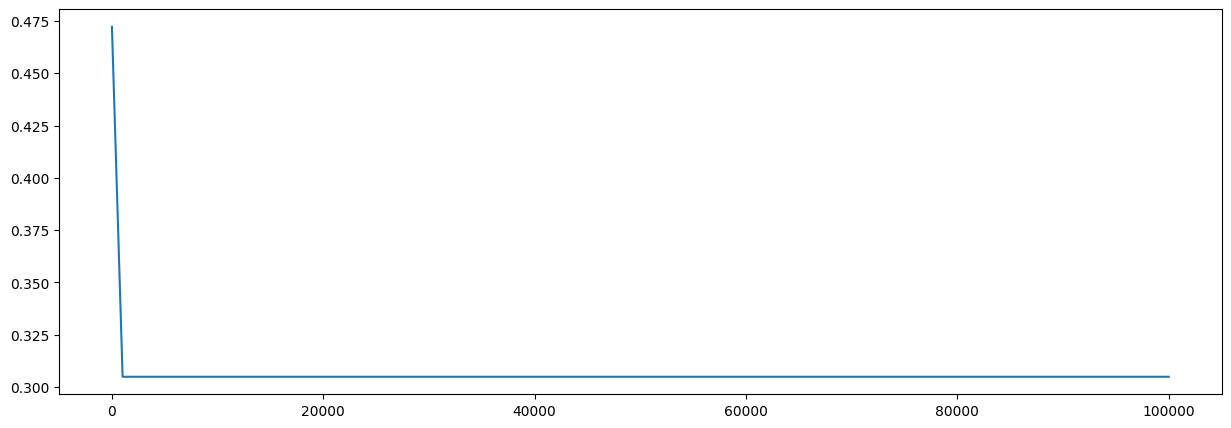

Best model alpha value: 1e-05
Accuracy on test: 47.22222222222222%.


Transformation using Kernel SplineTransformer
Result:
Training Score : 0.8074494949494949
Testing  Score : 0.8242990654205608


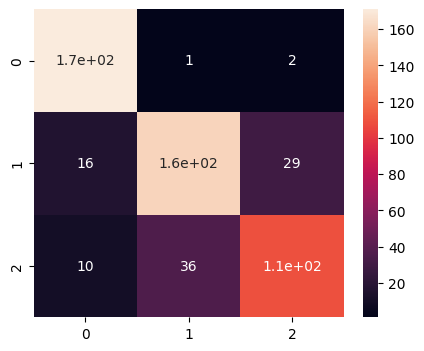

Optimizing Model....
Fitting 2 folds for each of 100 candidates, totalling 200 fits


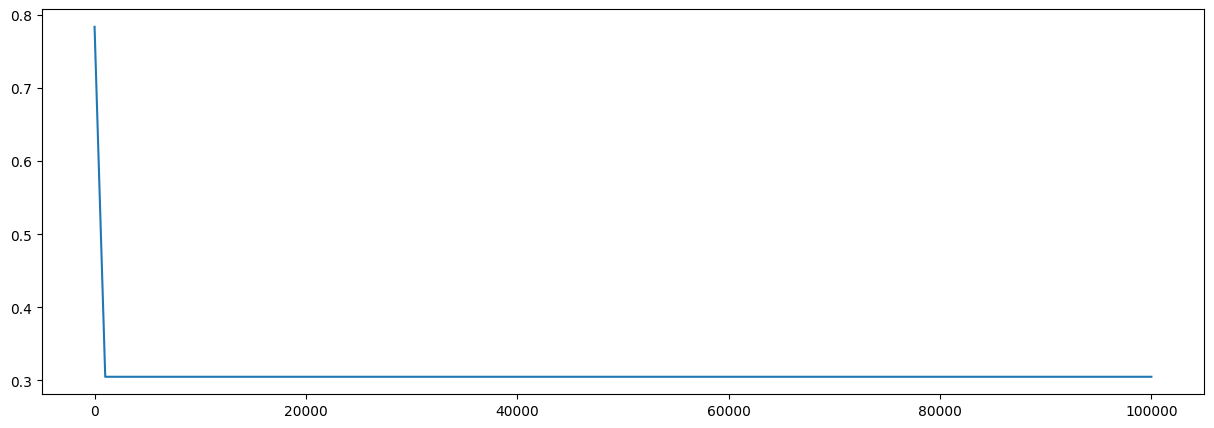

Best model alpha value: 1e-05
Accuracy on test: 78.40909090909092%.


Transformation using Kernel FunctionTransformer
Result:
Training Score : 0.615530303030303
Testing  Score : 0.6186915887850467


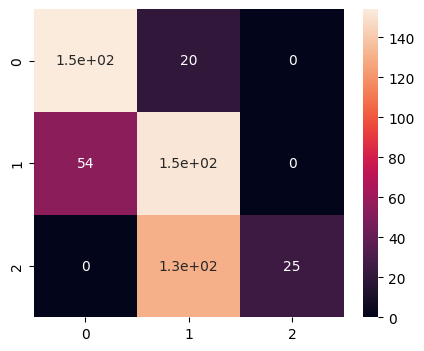

Optimizing Model....
Fitting 2 folds for each of 100 candidates, totalling 200 fits


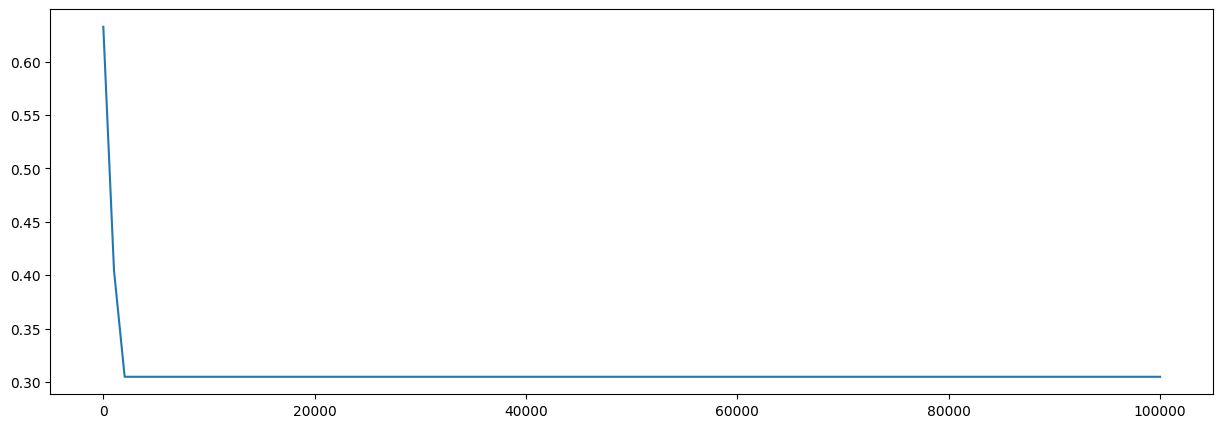

Best model alpha value: 1e-05
Accuracy on test: 63.25757575757576%.




In [38]:
# for transformed data
for name, kernel in kernels.items():
    print(f"Transformation using Kernel {name}")
    X_tr = kernel.fit_transform(x_tr)
    X_ts = kernel.fit_transform(x_te)
    make_models(X_tr, X_ts, y_tr, y_te)
    print()
    print("="*120)
    print()

## Task 4: Non-parametric KNN Classification [15 pts]

### Part 1

In [39]:
df_train = pd.read_csv('Data_train.csv', usecols=['x','y','class'])
df_test = pd.read_csv('Data_test.csv', usecols=['x','y','class'])

In [40]:
# split data
X_train = df_train.drop('class', axis=1)
X_test = df_test.drop('class', axis=1)

y_train = df_train['class']
y_test = df_test['class']

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
# classifying the original data from K=1 to K=200
score=[]
K_value = {}
score_vis=[]
for i in range(1,201):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    K_value={i:knn.score(X_test, y_test)}
    score_vis.append(knn.score(X_test, y_test))
    score.append(K_value)

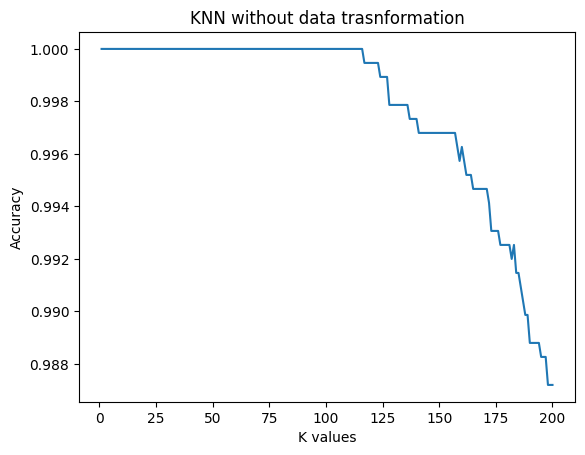

In [43]:
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.title("KNN without data trasnformation")
plt.plot(range(1,201), score_vis)
plt.show()

### Part 2

In [44]:
# task 1
score=[]
K_value = {}
score_vis=[]
for i in range(1,201):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_tr, y_tr)
    K_value={i:knn.score(x_te, y_te)}
    score_vis.append(knn.score(x_te, y_te))
    score.append(K_value)

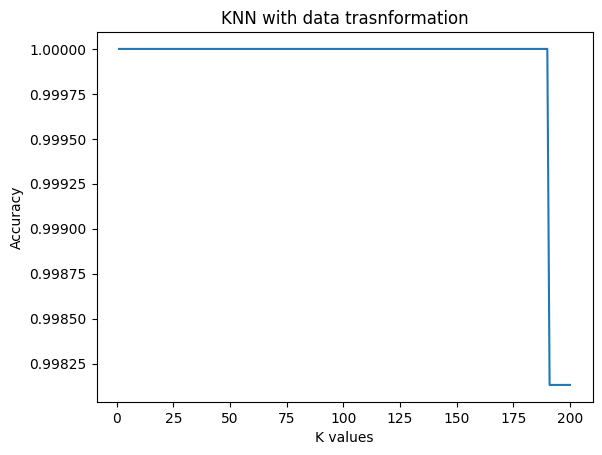

In [45]:
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.title("KNN with data trasnformation")
plt.plot(range(1,201), score_vis)
plt.show()

In [46]:
# task 3
def make_models(X_train, X_test, y_train, y_test):
    print(f"Result of Model without Optimization are....")
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)
    evalute(model, X_train, X_test, y_train, y_test)


    print(f"Optimizing Model....")
    k = range(1, 201, 1)

    params = {
        "n_neighbors": k
    }

    grid = GridSearchCV(KNeighborsClassifier(n_neighbors=3), params, n_jobs=-1, verbose=1, return_train_score=True, cv=2)
    res = grid.fit(X_train, y_train)

    scores = res.cv_results_["mean_test_score"]


    plt.figure(figsize=(15, 5))
    sns.lineplot(x=k, y=scores)
    plt.show()

    print(f'Accuracy: {(res.best_score_)*100}%.')

Transformation using Kernel PolynomialFeatures
Result of Model without Optimization are....
Training Score : 1.0
Testing  Score : 1.0


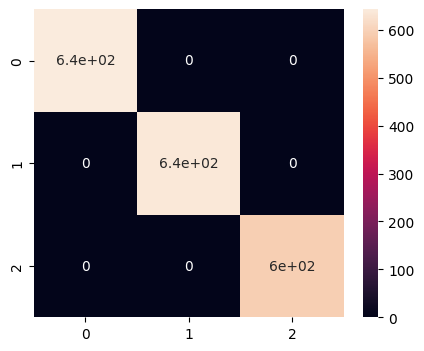

Optimizing Model....
Fitting 2 folds for each of 200 candidates, totalling 400 fits


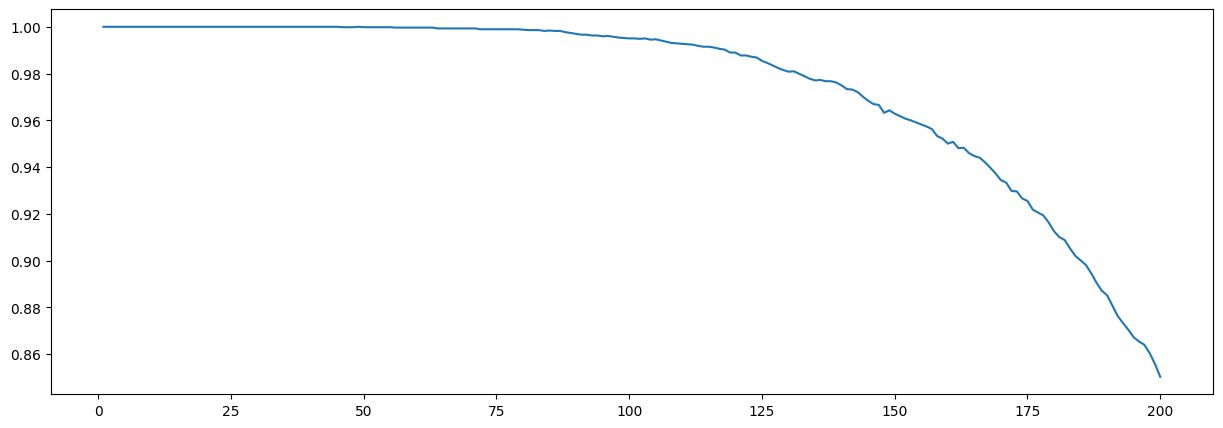

Accuracy: 100.0%.


Transformation using Kernel PowerTransformer
Result of Model without Optimization are....
Training Score : 1.0
Testing  Score : 1.0


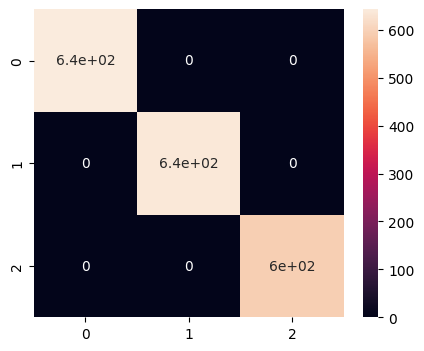

Optimizing Model....
Fitting 2 folds for each of 200 candidates, totalling 400 fits


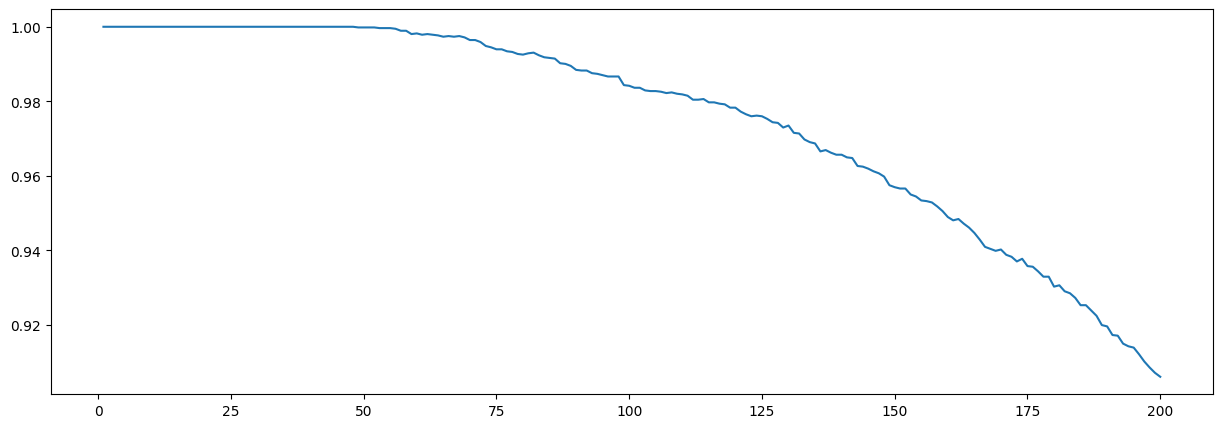

Accuracy: 100.0%.


Transformation using Kernel QuantileTransformer
Result of Model without Optimization are....
Training Score : 1.0
Testing  Score : 1.0


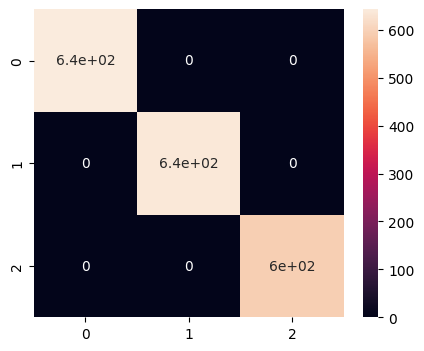

Optimizing Model....
Fitting 2 folds for each of 200 candidates, totalling 400 fits


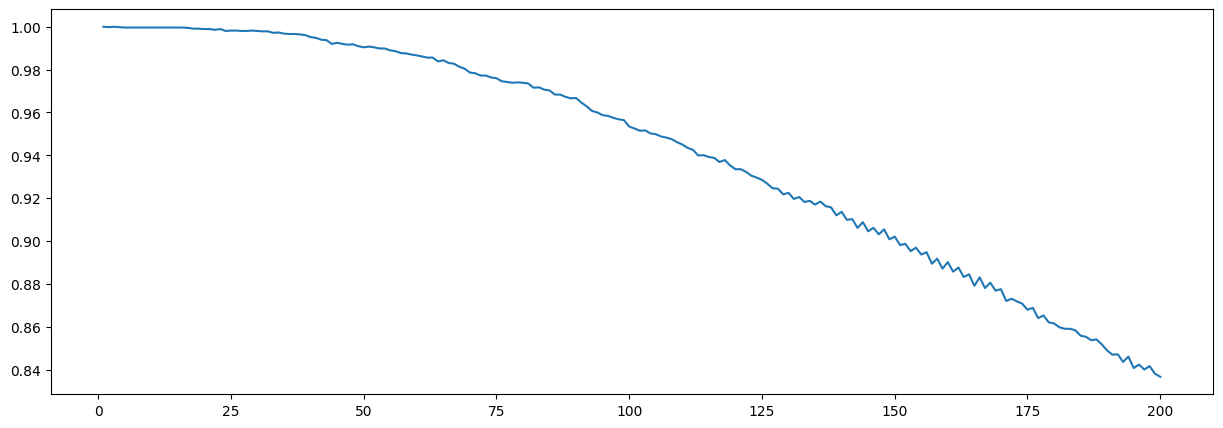

Accuracy: 100.0%.


Transformation using Kernel SplineTransformer
Result of Model without Optimization are....
Training Score : 1.0
Testing  Score : 1.0


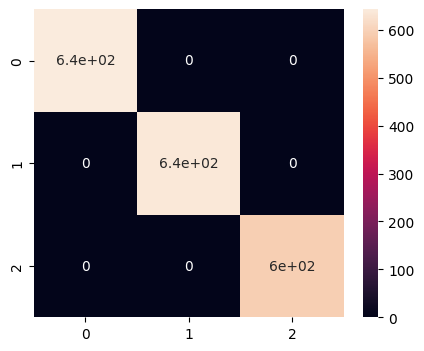

Optimizing Model....
Fitting 2 folds for each of 200 candidates, totalling 400 fits


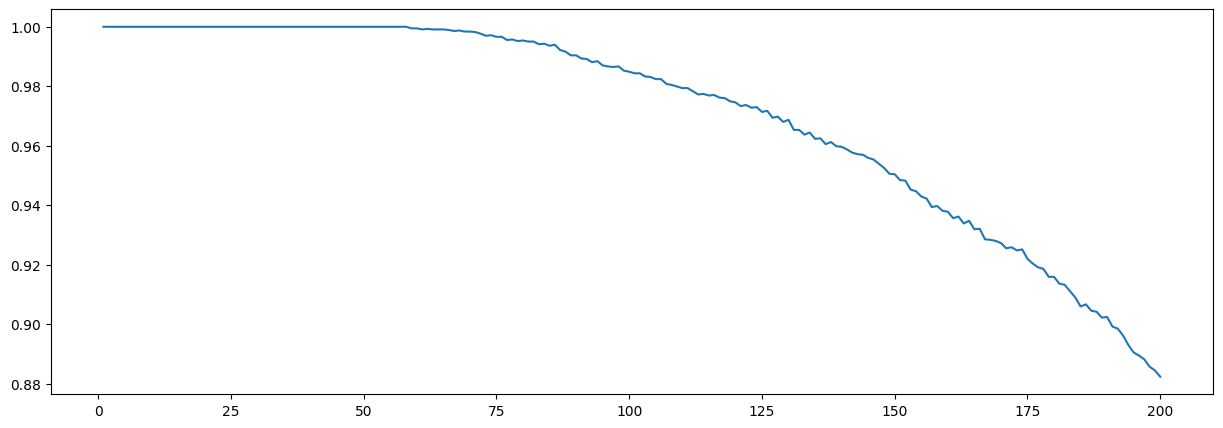

Accuracy: 100.0%.


Transformation using Kernel FunctionTransformer
Result of Model without Optimization are....
Training Score : 1.0
Testing  Score : 1.0


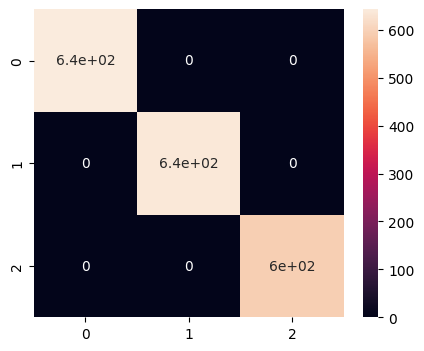

Optimizing Model....
Fitting 2 folds for each of 200 candidates, totalling 400 fits


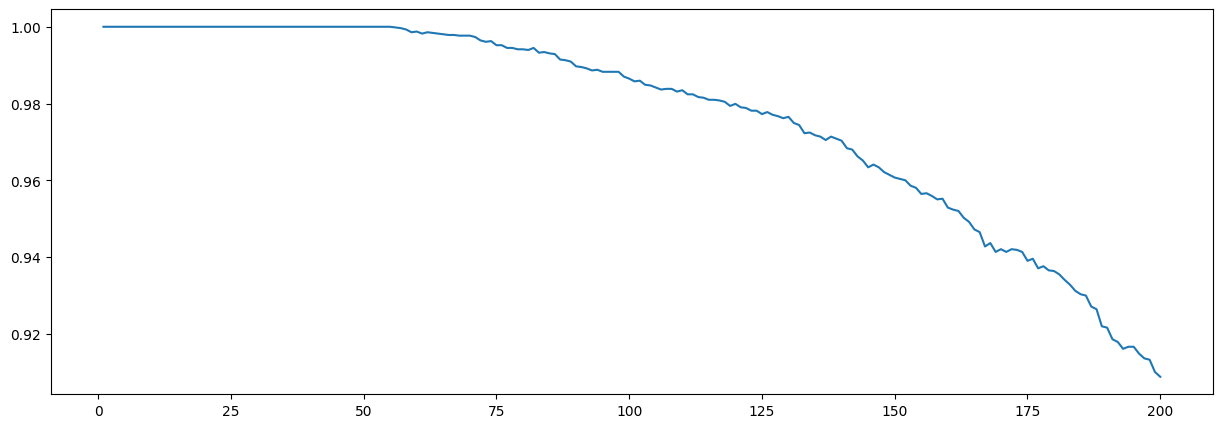

Accuracy: 100.0%.




In [47]:
for name, kernel in kernels.items():
    print(f"Transformation using Kernel {name}")
    X_tr = kernel.fit_transform(X_train)
    X_ts = kernel.fit_transform(X_test)
    make_models(X_tr, X_ts, y_train, y_test)
    print()
    print("="*120)
    print()